# Mountain Wheel Superstore Analysis
#### Visualization-focused analysis
##### Sheida

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

sales_2015_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Master Sales/Sales-2015.csv'
sales_2016_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Master Sales/Sales-2016.csv'
sales_2017_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Master Sales/Sales-2017.csv'

# Reading the sales data from each year
sales_2015 = pd.read_csv(sales_2015_file)
sales_2016 = pd.read_csv(sales_2016_file)
sales_2017 = pd.read_csv(sales_2017_file)

combined_sales = pd.concat([sales_2015, sales_2016, sales_2017])


combined_sales_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Master Sales/Sales.csv'
combined_sales.to_csv(combined_sales_file, index=False)


In [6]:
# Products and Product Categories and Product Subcategories data
products_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Products.csv'
product_categories_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Product-Categories.csv'
product_subcategories_file = '/Users/sheidamajidi/Desktop/Winter2024/COURSES/INSY695-PowerBi/Assignments/Assignment1/Data for Assignment 1/Product-Subcategories.csv'

products = pd.read_csv(products_file)
product_categories = pd.read_csv(product_categories_file)
product_subcategories = pd.read_csv(product_subcategories_file)
combined_sales = pd.read_csv(combined_sales_file)

In [7]:
# Merging combined sales data with product information
combined_sales = combined_sales.merge(products[['ProductKey', 'ProductSubcategoryKey']], on='ProductKey')

# Merging with product subcategory information
combined_sales = combined_sales.merge(product_subcategories[['ProductSubcategoryKey', 'ProductCategoryKey']], on='ProductSubcategoryKey')

# Merging with product category information
combined_sales = combined_sales.merge(product_categories[['ProductCategoryKey', 'CategoryName']], on='ProductCategoryKey')

# Grouping by CategoryName and Year, and summing up the sales
combined_sales['Year'] = pd.to_datetime(combined_sales['OrderDate']).dt.year
total_sales_by_category = combined_sales.groupby(['CategoryName', 'Year'])['OrderQuantity'].sum().reset_index()

# Pivoting the data for comparison
total_sales_comparison = total_sales_by_category.pivot(index='CategoryName', columns='Year', values='OrderQuantity').reset_index()
total_sales_comparison.columns.name = None  # Remove the index name
total_sales_comparison = total_sales_comparison.rename(columns={2015: 'TotalSales_2015', 2016: 'TotalSales_2016', 2017: 'TotalSales_2017'})

# Displaying the final comparison table
print(total_sales_comparison)

  CategoryName  TotalSales_2015  TotalSales_2016  TotalSales_2017
0  Accessories              NaN          25316.0          32493.0
1        Bikes           2630.0           5610.0           5689.0
2     Clothing              NaN           5304.0           7132.0


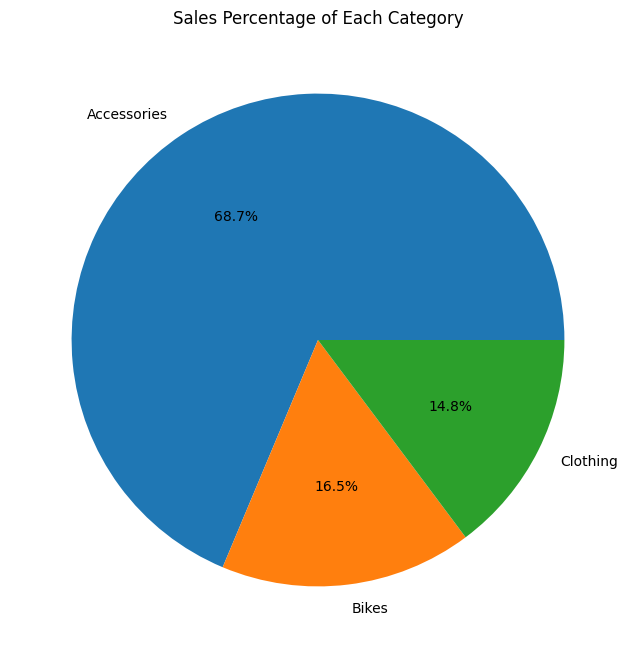

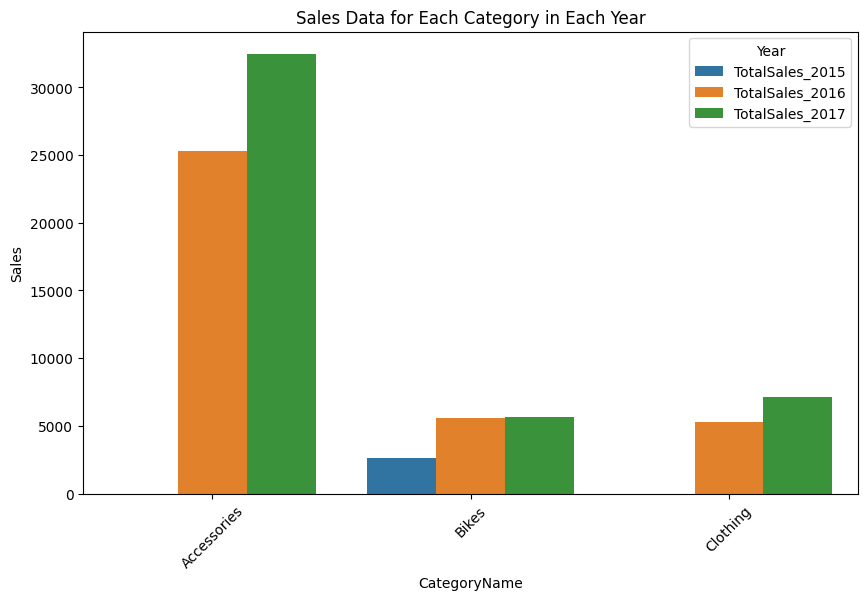

In [9]:
# Calculate total sales for each category across all years
total_sales_comparison['TotalSales_AllYears'] = total_sales_comparison[['TotalSales_2015', 'TotalSales_2016', 'TotalSales_2017']].sum(axis=1)

# Compute the percentage share of each category
total_sales_comparison['Percentage'] = (total_sales_comparison['TotalSales_AllYears'] / total_sales_comparison['TotalSales_AllYears'].sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_comparison['Percentage'], labels=total_sales_comparison['CategoryName'], autopct='%1.1f%%')
plt.title('Sales Percentage of Each Category')
plt.show()

# Visualize Sales Data for Each Category in Each Year
plt.figure(figsize=(10, 6))
melted_data = total_sales_comparison.melt(id_vars=['CategoryName'], value_vars=['TotalSales_2015', 'TotalSales_2016', 'TotalSales_2017'], var_name='Year', value_name='Sales')
sns.barplot(x='CategoryName', y='Sales', hue='Year', data=melted_data)
plt.title('Sales Data for Each Category in Each Year')
plt.xticks(rotation=45)
plt.show()

Analysis for Sales 2015
              Data Type  Missing Values (%)
OrderDate        object                 0.0
StockDate        object                 0.0
OrderNumber      object                 0.0
ProductKey        int64                 0.0
CustomerKey       int64                 0.0
TerritoryKey      int64                 0.0
OrderLineItem     int64                 0.0
OrderQuantity     int64                 0.0 



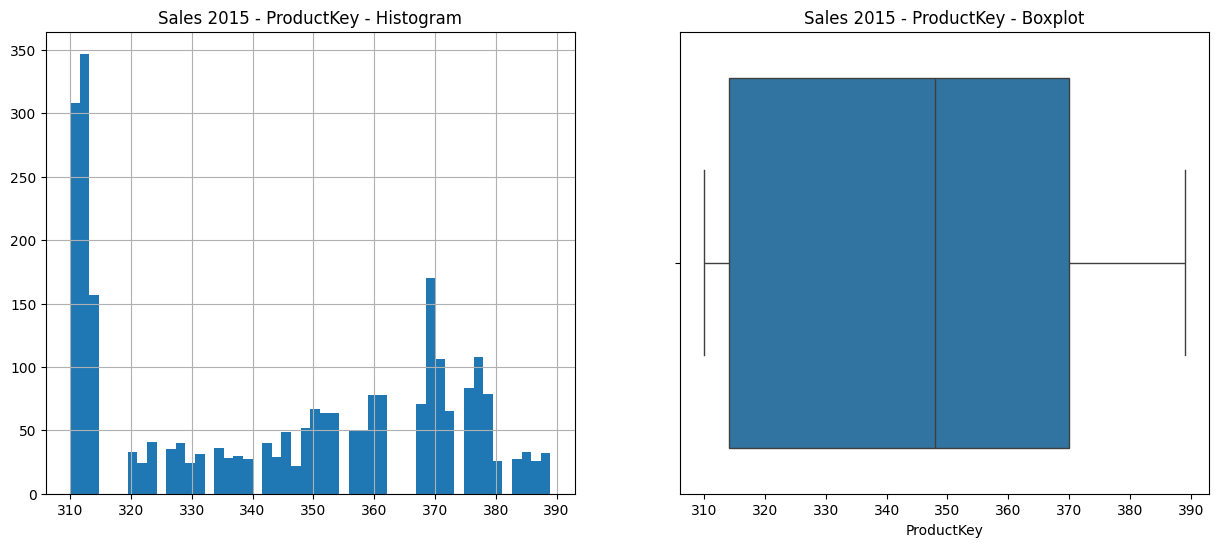

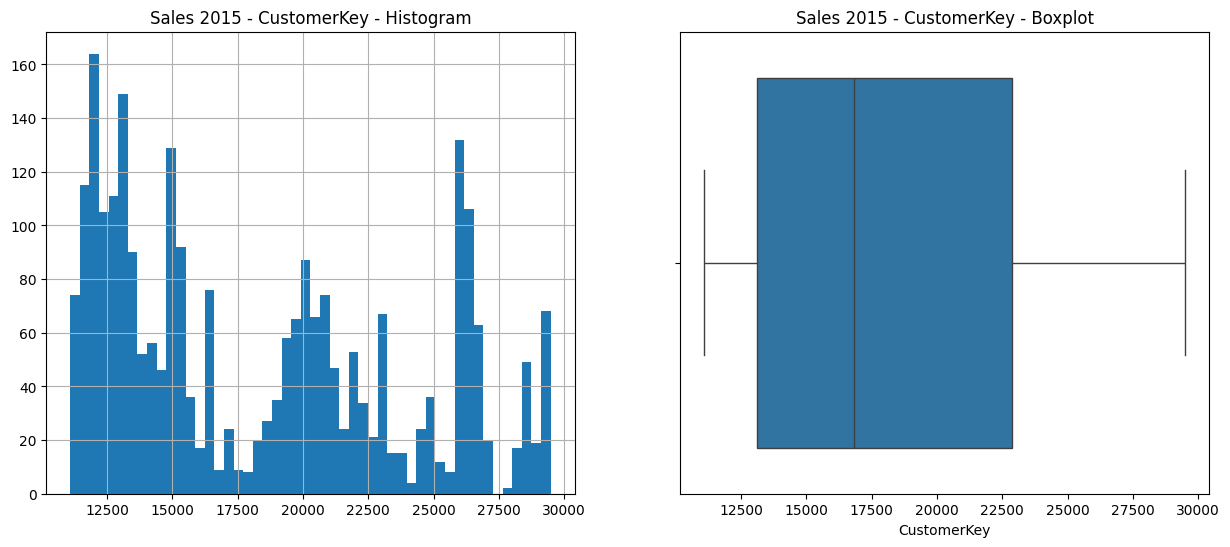

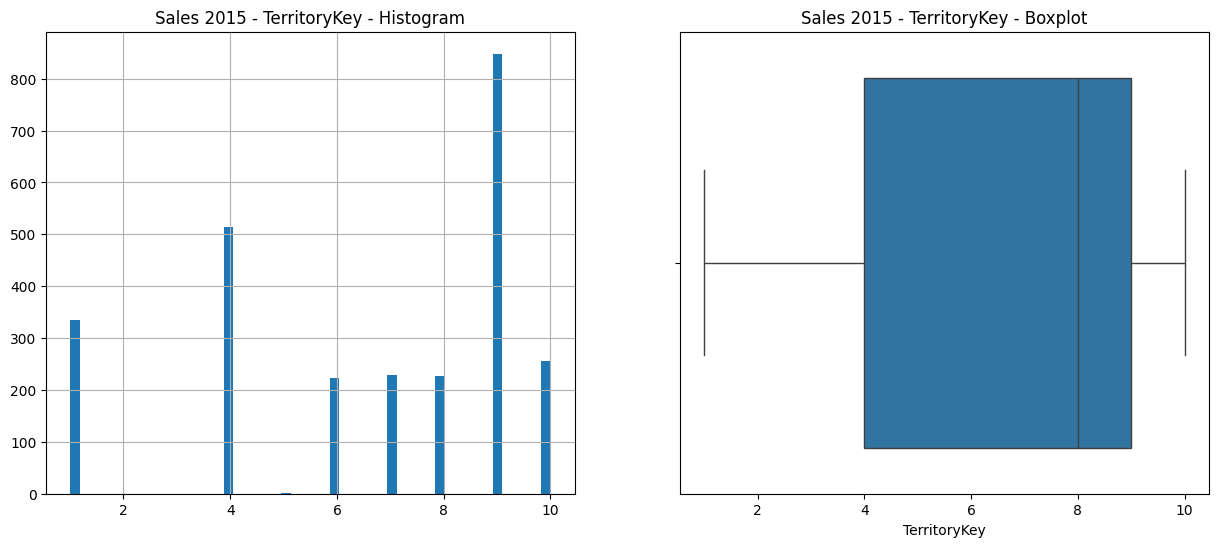

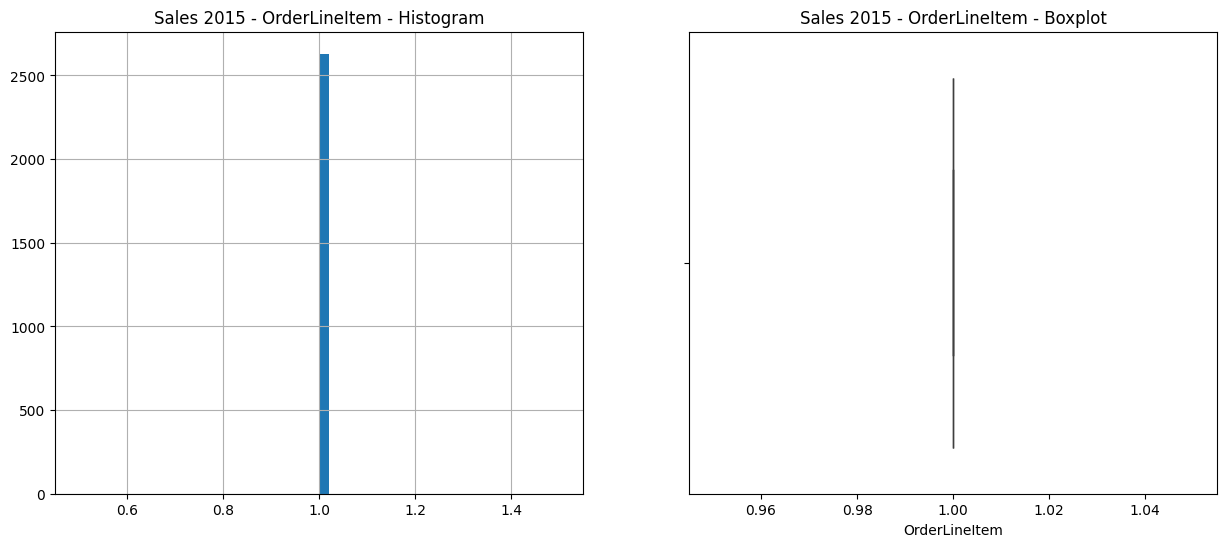

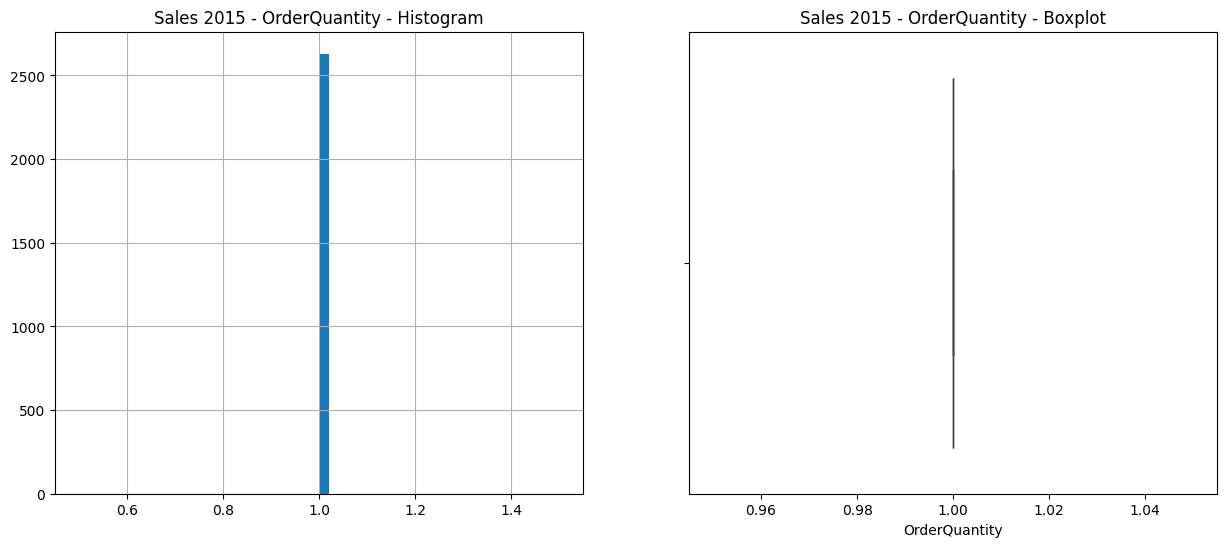

Analysis for Sales 2016
              Data Type  Missing Values (%)
OrderDate        object                 0.0
StockDate        object                 0.0
OrderNumber      object                 0.0
ProductKey        int64                 0.0
CustomerKey       int64                 0.0
TerritoryKey      int64                 0.0
OrderLineItem     int64                 0.0
OrderQuantity     int64                 0.0 



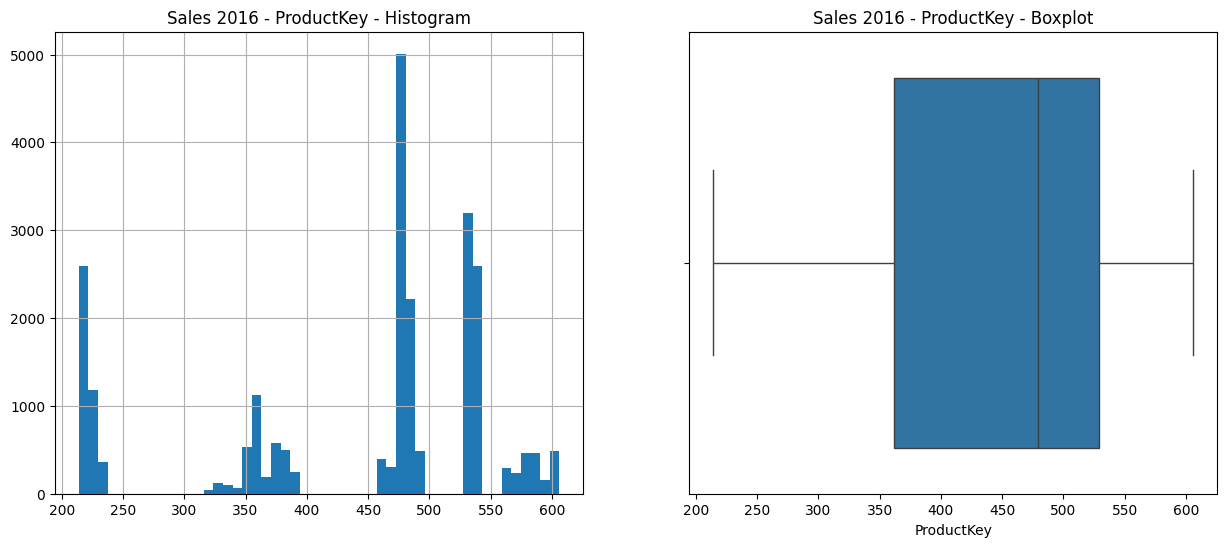

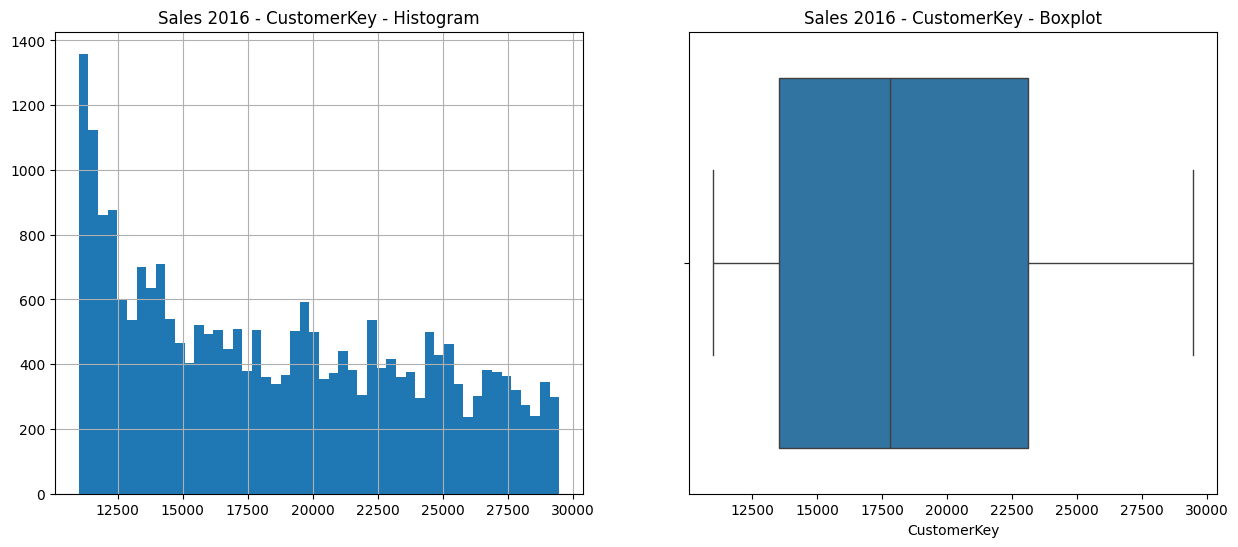

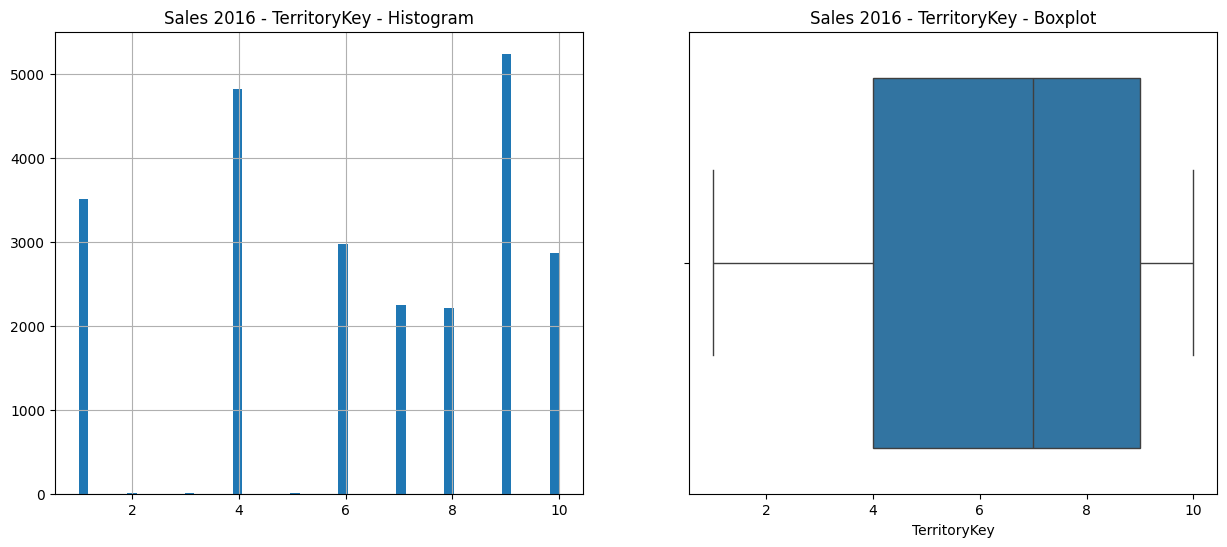

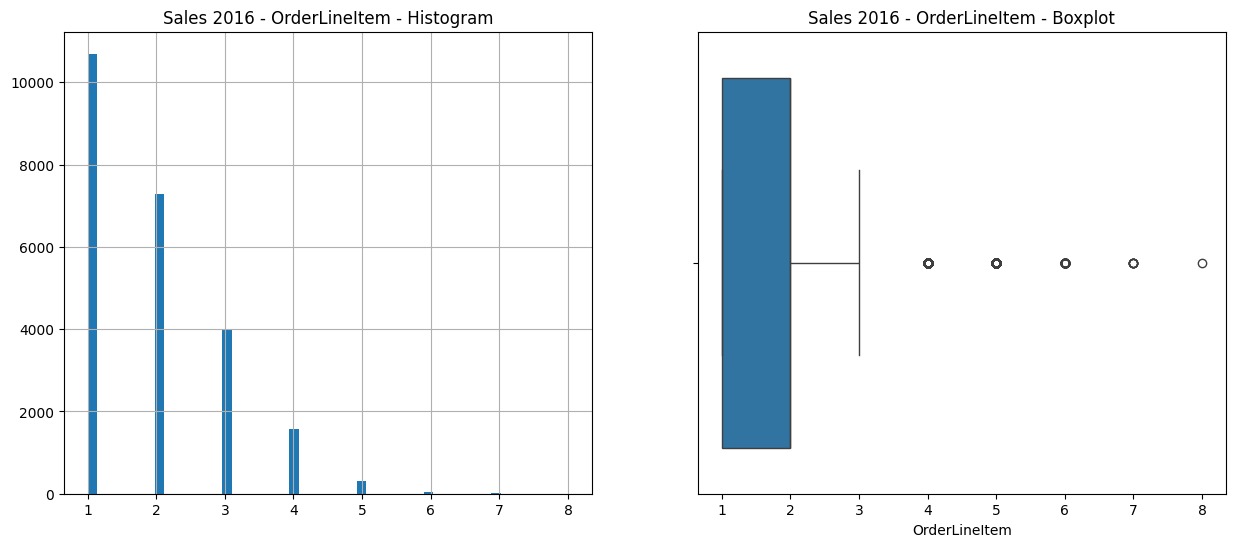

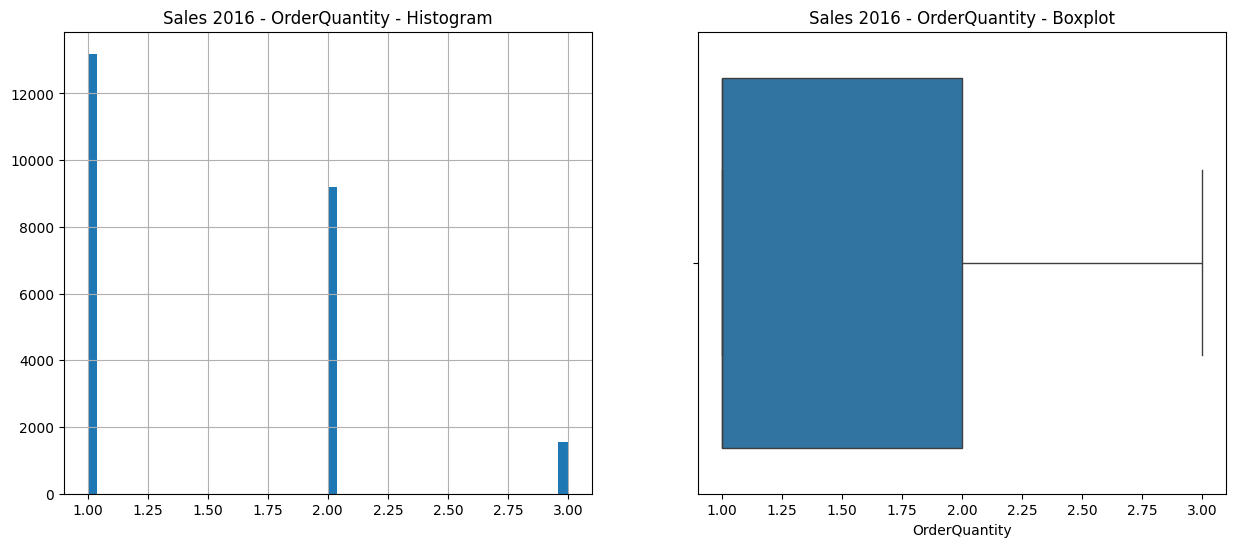

Analysis for Sales 2017
              Data Type  Missing Values (%)
OrderDate        object                 0.0
StockDate        object                 0.0
OrderNumber      object                 0.0
ProductKey        int64                 0.0
CustomerKey       int64                 0.0
TerritoryKey      int64                 0.0
OrderLineItem     int64                 0.0
OrderQuantity     int64                 0.0 



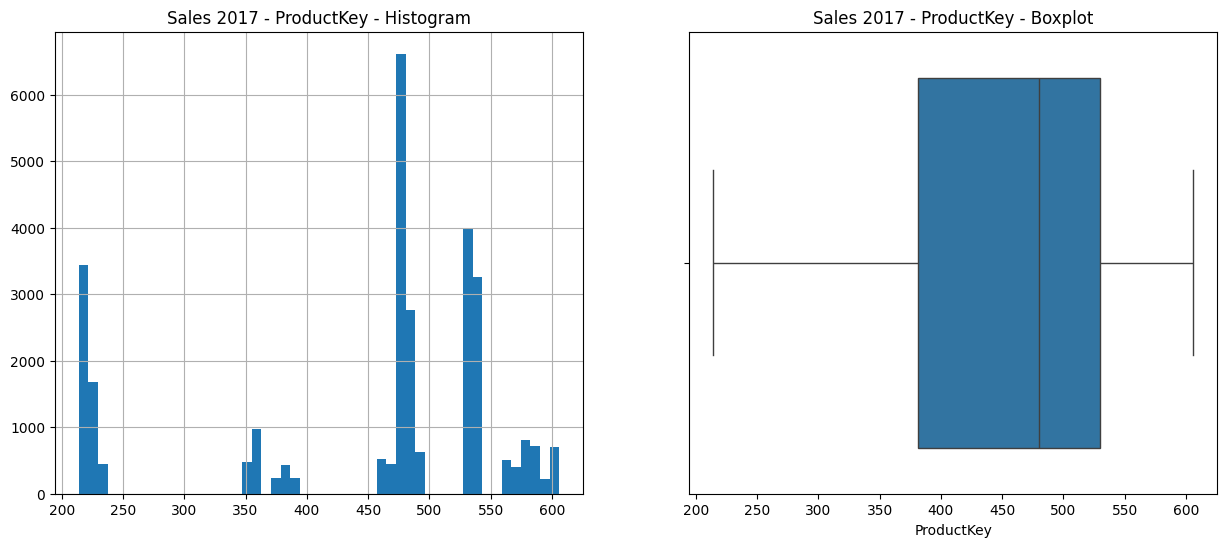

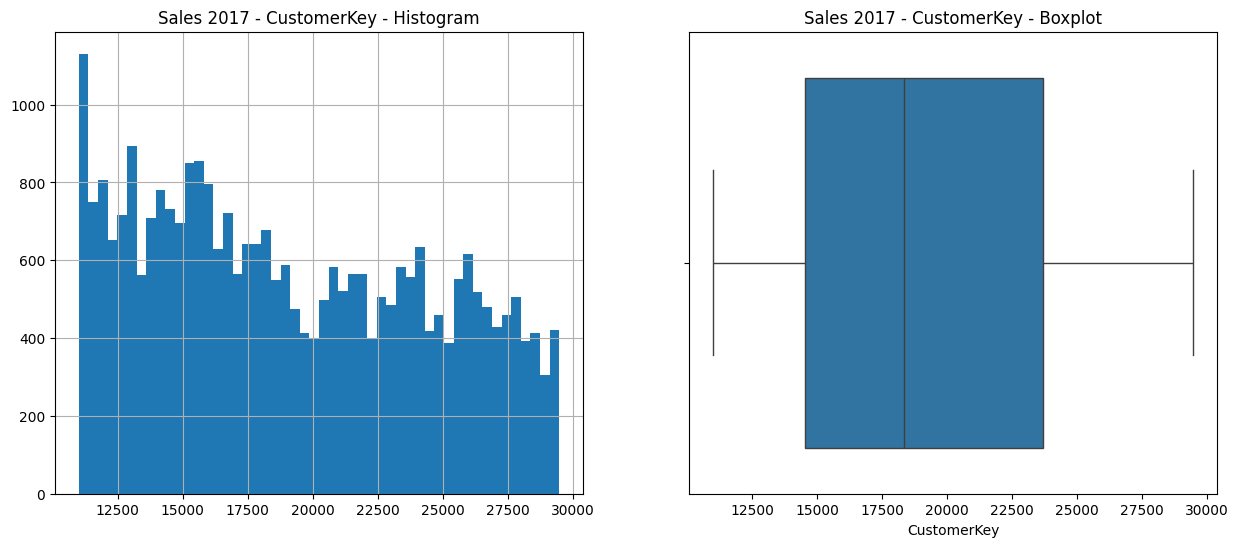

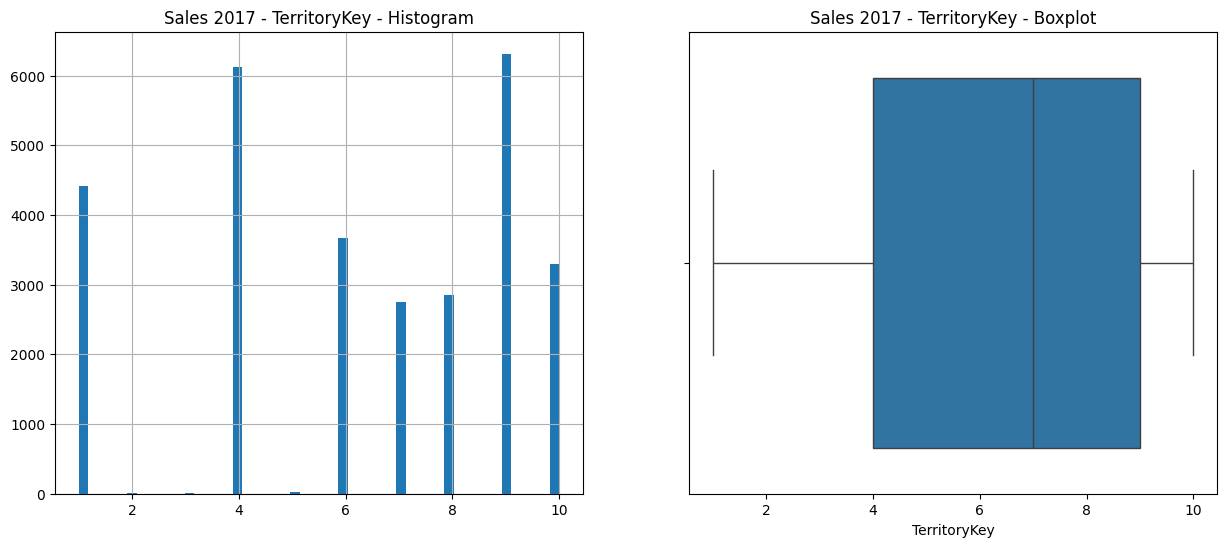

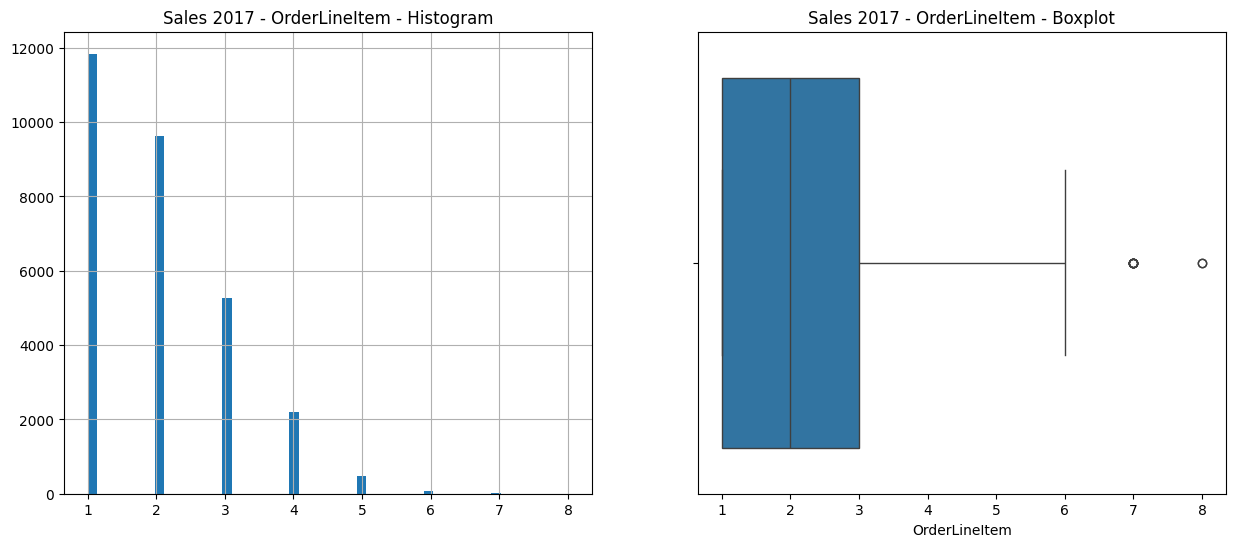

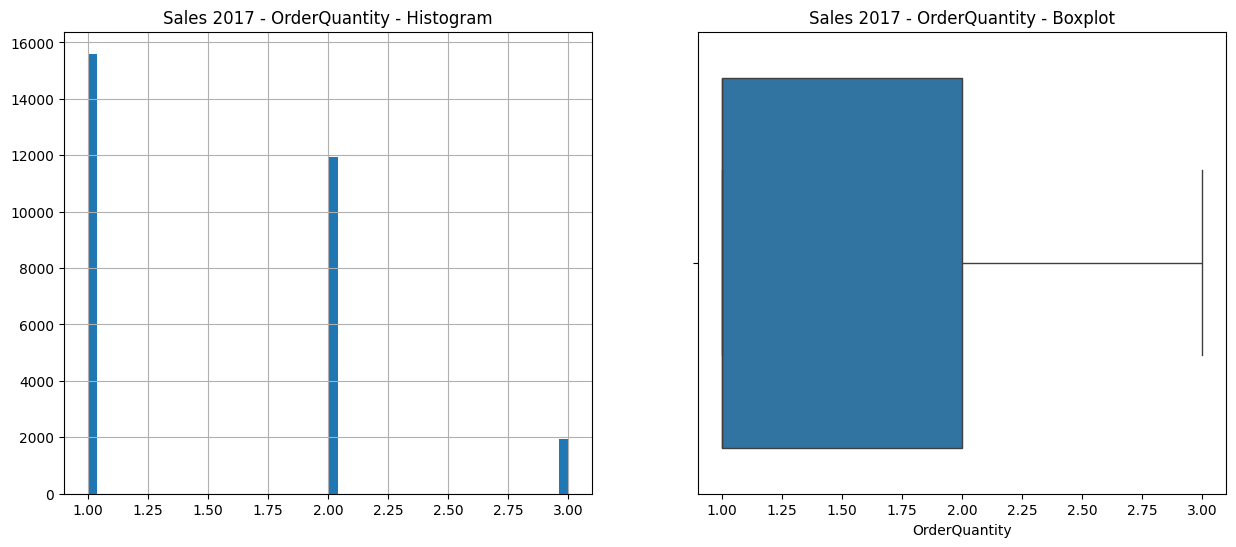

Analysis for Products
                      Data Type  Missing Values (%)
ProductKey                int64            0.000000
ProductSubcategoryKey     int64            0.000000
ProductSKU               object            0.000000
ProductName              object            0.000000
ModelName                object            0.000000
ProductDescription       object            0.000000
ProductColor             object           17.064846
ProductSize              object            0.000000
ProductStyle             object            0.000000
ProductCost             float64            0.000000
ProductPrice            float64            0.000000 



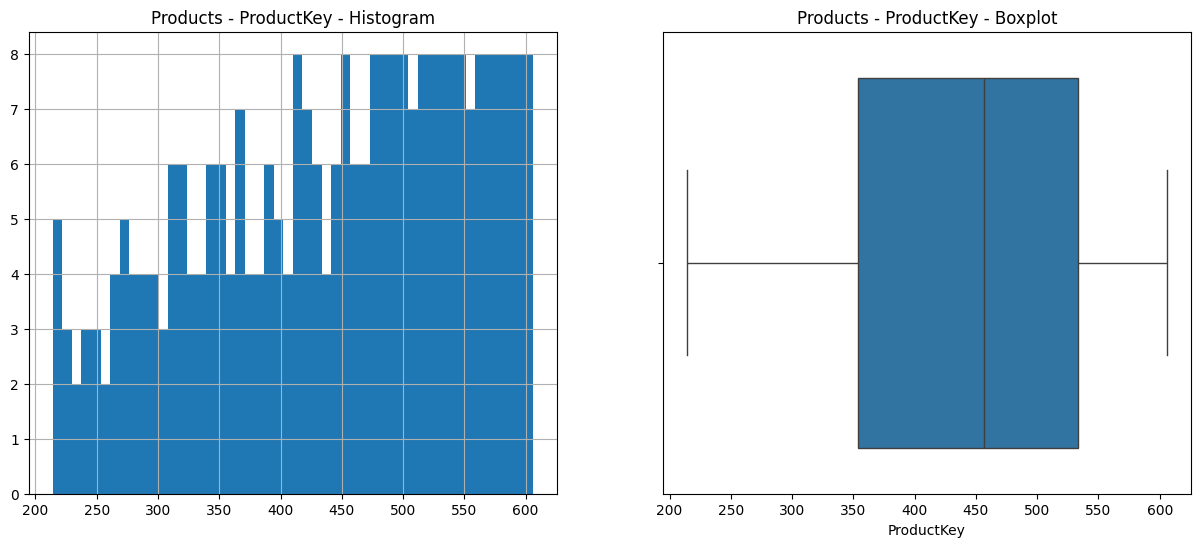

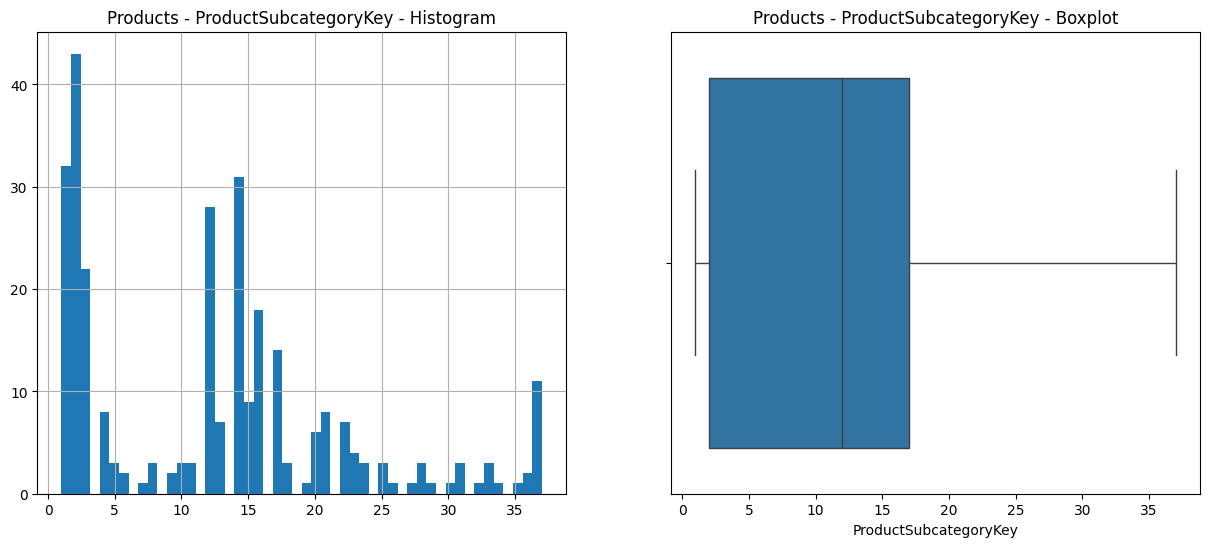

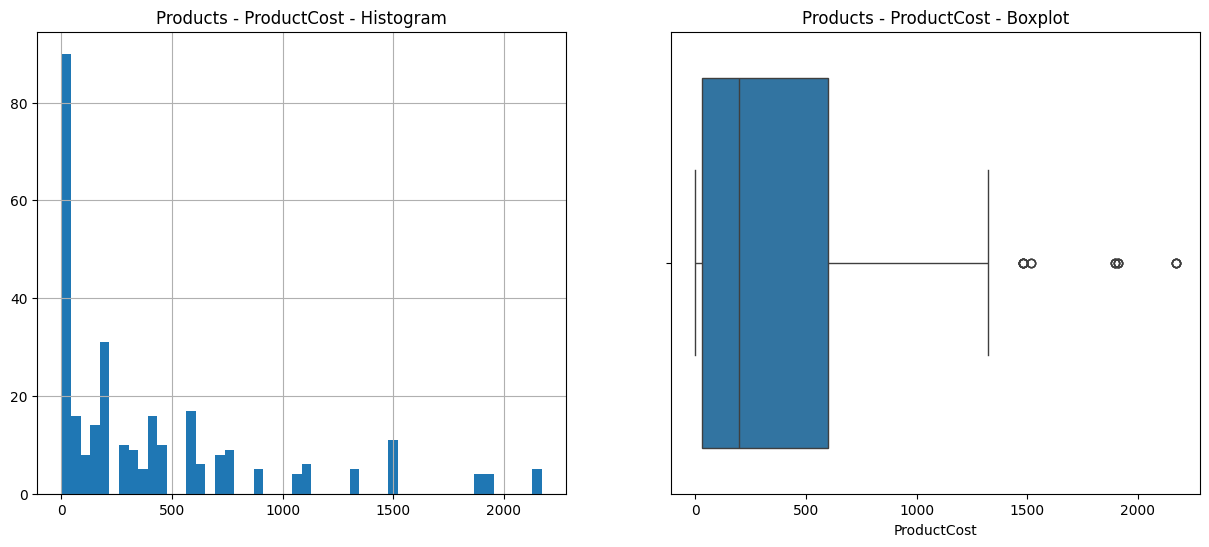

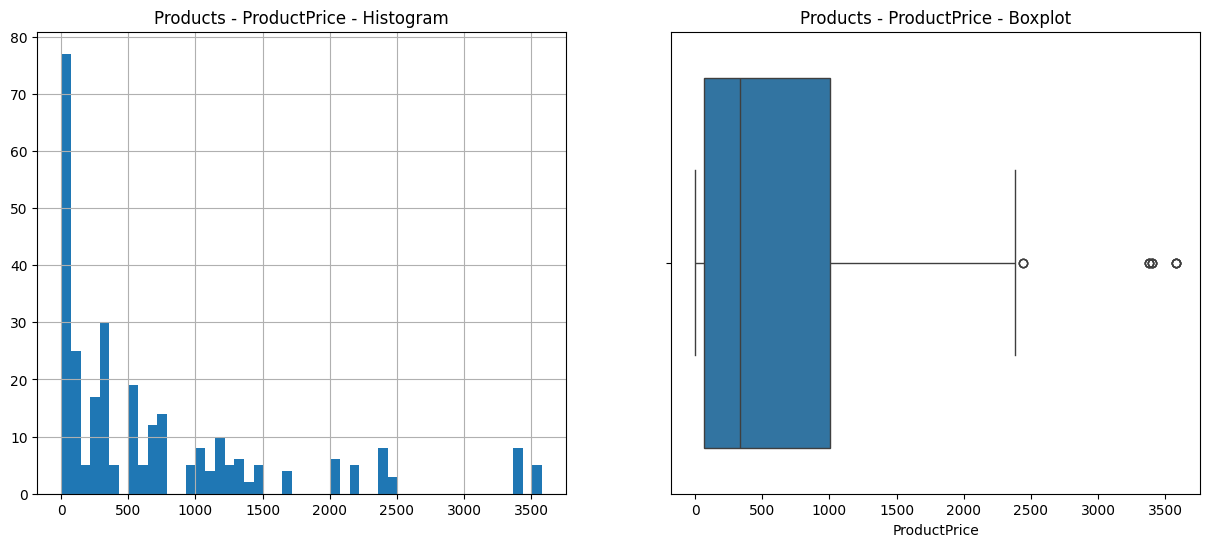

Analysis for Product Categories
                   Data Type  Missing Values (%)
ProductCategoryKey     int64                 0.0
CategoryName          object                 0.0 



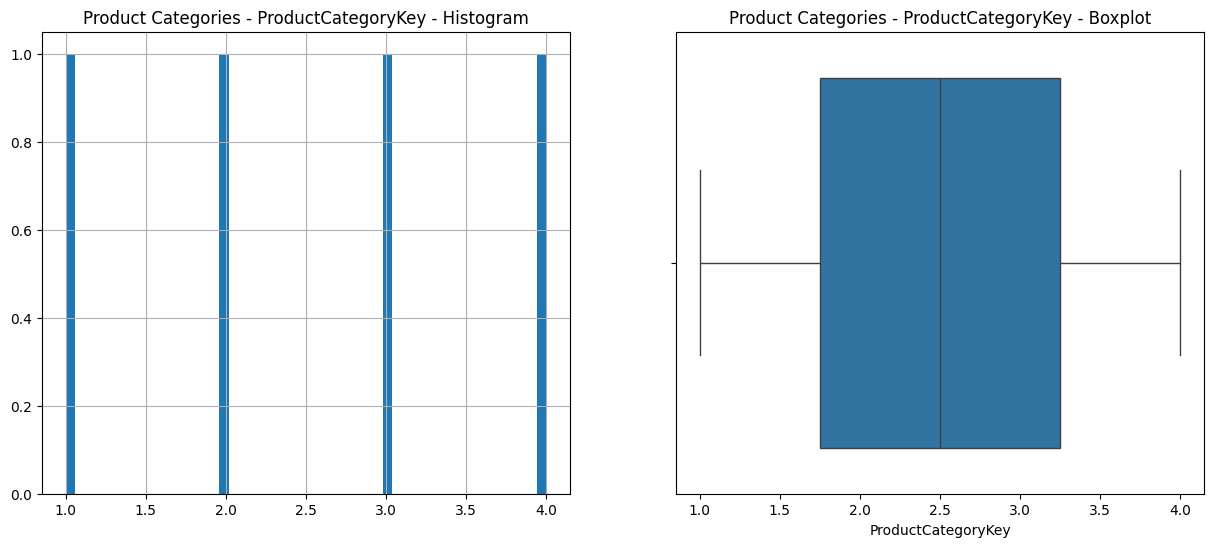

Analysis for Product Subcategories
                      Data Type  Missing Values (%)
ProductSubcategoryKey     int64                 0.0
SubcategoryName          object                 0.0
ProductCategoryKey        int64                 0.0 



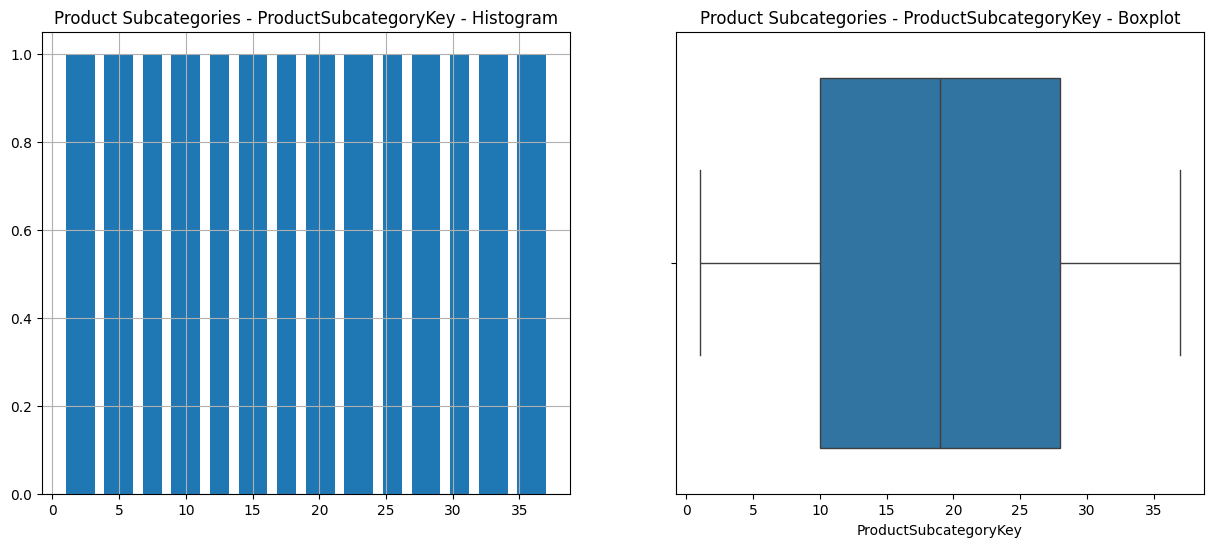

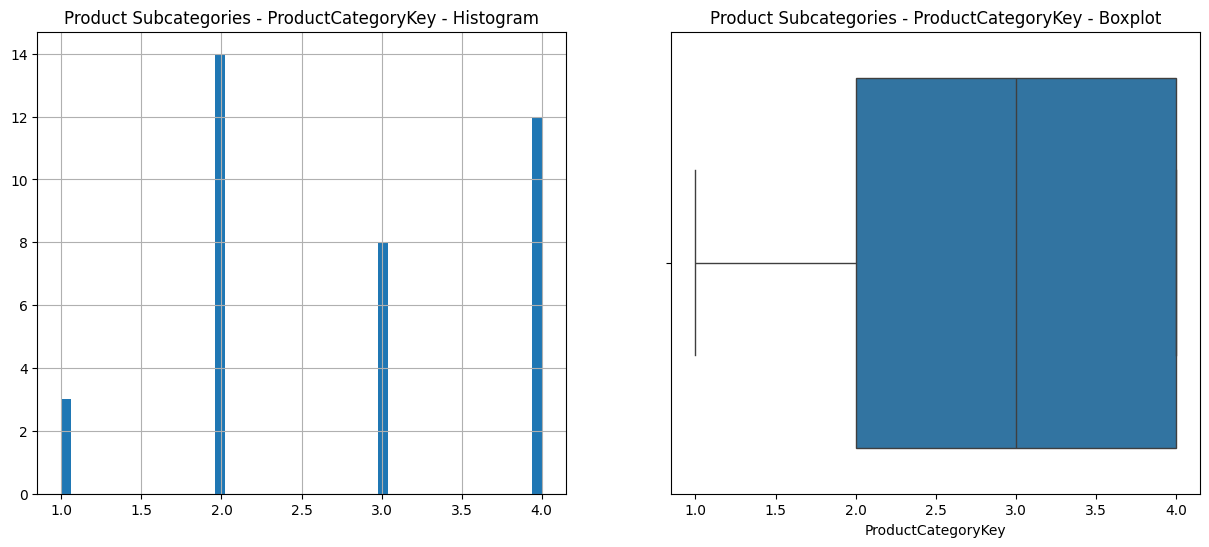

In [15]:
# Analyzing each DataFrame
dataframes = {
    'Sales 2015': sales_2015,
    'Sales 2016': sales_2016,
    'Sales 2017': sales_2017,
    'Products': products,
    'Product Categories': product_categories,
    'Product Subcategories': product_subcategories
}

for name, df in dataframes.items():
    print(f"Analysis for {name}")
    data_types = df.dtypes
    missing_values = df.isnull().mean() * 100
    analysis = pd.DataFrame({'Data Type': data_types, 'Missing Values (%)': missing_values})
    print(analysis, "\n")

    # Visualizing distributions and potential outliers/noise for numeric columns
    for column in df.select_dtypes(include=['float64', 'int64']):
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        df[column].hist(bins=50)
        plt.title(f"{name} - {column} - Histogram")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f"{name} - {column} - Boxplot")

        plt.show()